# Lab 4
* **Name**: Utkarsh Prakash
* **Roll Number**: 180030042

## Title
Demostrate the working principle of two layer auto-associative network.

## Objective
* To observe and understand different methods of finding optimal weights in a pattern association task.
* To understand the effect of linearly independent, linearly dependent, orthogonal and orthonormal input vectors.

## Hypothesis:
* In a auto-association task the number of patterns that can be learnt is not limited by the input dimension i.e number of training examples ($L$) should be less than or equal to input vector dimension ($M$).
* When weights are learnt by computation, then there should be a perfect recall.
* When weights are learnt by using the Hebb's learning law, then there should be a perfect recall in the case of orthonormal input vectors.
* When weights are learnt by using the Widrow-Hoff learning law, then there should be a perfect recall.

## Experimental Description:
1. **Data Generation:** <br />
We generate random linearly independent vectors for training. For generating orthogonal vectors we use Householder matrices/reflections. <br/><br />
2. **Network:** <br /><br />
![Linear Auto-Associative Feedforward Network](tmp/IMG_4671.jpg) <br /><br />
3. **Operations:** <br />
Let $A$ be a $M\times L$ matrix of input vectors (training examples) where each column represents a training examples. Let $B$ be a $N \times L$ matrix of desired output vectors where each column represents the desired output for the corresponding training example in the matrix $A$. Let $B'$ denote the output obtained from the neuron. Let $W$ be the weight matrix such that $B' = WA$. <br />
The error between the desired output vectors $(B)$ and the actual output vectors $(B')$ is given as follows:<br />
<center> $E = \frac{1}{L} ||B - B'||_{2}$ </center> <br />
Moreover, since it's an auto-association task, hence $A=B$. <br />

     **Weights by Computation:**<br />
Now, it can be shown that the minimum error E can be obtained when $W = BA^+$ where $A^+$ presents the Moore-Penrose pseudo inverse of the matrix A. <br /><br />
      **Weights by Hebbian Learning Law:**<br />
Let $W_{ji}(l)$ represent the weight after processing $l$ input-output pattern pairs. Let $a_l$ be the $l^{th}$ input pattern vector and $b_l$ be the corresponding desired output vector applied to the linear associative network. Then the weight update equation is given as follows:<br />
<center> $w_{ji}(l) = w_{ji}(l-1) + a_{li}b_{lj}$ </center> <br />
where $i=1,2,...,M$ and $j=1,2,...,N$ <br />
In matrix form, the update equation for the $l^{th}$ pattern pair $(a_l, b_l)$ is given by: <br />
<center> $W(l) = W(l-1) + b_la_l^T$ </center> <br />
where $W(l)$ is the weight matrix after the presentation of $l$ input-output pattern pairs.<br /><br />

      **Weights by Widrow's Learning Law:**<br />
Using, the notations defined earlier, the weight update equation for Widrow's Learning Law is given by: <br />
<center>$w_{ji}(l) = w_{ji}(l-1) + \eta(b_{lj} - w_{j}^T(l-1)a_l)a_{li}$ </center> <br />
where $\eta$ is a small positive constant called the learning rate parameter. <br/>
In matrix form, the update equation for the $l^{th}$ pattern pair $(a_l, b_l)$ is given by: <br />
<center> $W(l) = W(l-1) + \eta(b_l - W(l-1)a_l)a_l^T$ </center> <br /> <br />
4. **Training:** <br />
For weights by learning, we randomly present one training example to the network. <br /> <br />
5. **Testing:** <br />
For testing, the error between the desired output vectors $(B)$ and the actual output vectors $(B')$ is given as follows:<br />
<center> $E = \frac{1}{L} ||B - B'||_{2}$ </center> <br />

## Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
def generate_linearly_independent(m, l):
    '''
        This function generates linearly independent vectors
        where m is the dimension of the input vectors and l 
        is the number of input vectors. 
    '''
    A = np.random.rand(m,l)            # Random matrix A
    r = np.linalg.matrix_rank(A)       # Rank calculation
    
    # Repeat until the rank of A is equal to the number of desired linearly independent vectors
    while r < l:
        A = np.random.rand(m,l)
        r = np.linalg.matrix_rank(A)
        
    return A

In [3]:
def generate_linearly_dependent(m, l, r):
    '''
        This function generates linearly dependent vectors
        where m is the dimension of the input vectors, l is 
        the number of input vectors and r is the rank of the
        desired matrix.
    '''
    
    li = generate_linearly_independent(m, r)     #Linearly independent vectors
    
    A = li
    
    # Repeat the generated linearly independent vectors by multiplying the generated
    # vectors by a constant number
    for i in range(1, l//r):
        A = np.c_[A, (i+1)*li]
    
    A = np.c_[A, (l//r+1)*A[:, :l%r]]
    
    return A

### Householder reflections
Let $u$ be a unit vector i.e. $u^Tu = 1$. Then $H = I - 2uu^T$ is an orthogonal matrix i.e. $H^TH=I$. <br /><br />
**Proof:**<br />
$H^TH = (I - 2uu^T)^T(I - 2uu^T)$ <br />
$= (I - 2uu^T)(I - 2uu^T)$ <br />
$= I - 2uu^T - 2uu^T + 4u(u^Tu)u^T$<br /> 
$= I - 4uu^T + 4uu^T$ <br />
$= I$ <br />

In [4]:
def generate_orthonormal(m, l):
    '''
        This function generates orthonormal vectors. First
        we generate a Householder matrix of m-dimension.
        Then we select the first l vectors from the formed
        Householder matrix.
    '''
    v = np.random.rand(m,1)      # random vector
    u = v/np.linalg.norm(v)      # unit vector
    
    identity = np.eye(m)         # identity matrix
    
    H = identity - 2*np.dot(u, u.T)   # Householder matrix
    
    return H[:, :l]             # return first l vectors

In [5]:
def MeanSquaredError(w, A, norm=False):
    '''
        This function calculates the mean squared error
        between the actual output vectors and desired 
        output vectors.
    '''
    # Normalize the input vectors if norm = True
    if norm:
        A = (A - np.mean(A, axis=1, keepdims=True))/np.std(A, axis=1, keepdims=True)
    
    b_pred = np.dot(w, A)          # output value
    
    return np.linalg.norm(b_pred - A)**2/A.shape[1]     # Calculate LMS error

### Weights by Computation

In [6]:
def weights_by_computation(A):
    '''
        This function finds the optimal weights of the network
        using computation method (Linear Algebra method).
    '''

    return np.dot(A, np.linalg.pinv(A))

In [36]:
print("Linearly Independent Vectors")
print("----------------------------")
start_time = time.time()
A = generate_linearly_independent(m=100, l=10)       # Linearly independent vectors
w = weights_by_computation(A)                        # Weight calculation
print("Error:", MeanSquaredError(w, A))              # Error calculation
print("Time Taken: {}\n".format(time.time() - start_time))

print("Linearly Dependent Vectors")
print("----------------------------")
start_time = time.time()
A1 = generate_linearly_dependent(m=100, l=200, r=1) # Linearly dependent vectors
w1 = weights_by_computation(A1)                     # Weight calculation
print("Error:", MeanSquaredError(w1, A1))           # Error calculation 
print("Time Taken: {}\n".format(time.time() - start_time))

print("Orthonormal Vectors")
print("-------------------")
start_time = time.time()
A2 = generate_orthonormal(m=100, l=10)             # Orthonormal vectors
w2 = weights_by_computation(A2)                    # Weight calculation
print("Error:", MeanSquaredError(w2, A2))          # Error calculation
print("Time Taken: {}".format(time.time() - start_time))

Linearly Independent Vectors
----------------------------
Error: 1.4723734424840418e-31
Time Taken: 0.002708911895751953

Linearly Dependent Vectors
----------------------------
Error: 1.6663245936917505e-30
Time Taken: 0.002572774887084961

Orthonormal Vectors
-------------------
Error: 5.3864704630248295e-31
Time Taken: 0.0066106319427490234


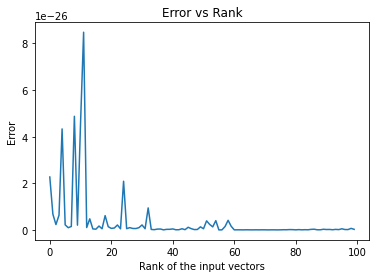

In [43]:
# Study of behavior of error vs rank of the input matrix
error = []

for i in range(1, 100+1):
    A1= generate_linearly_dependent(m=100, l=100, r=i)     # Linearly independent vectors of rank i
    w1 = weights_by_computation(A1)                        # weight calculation
    error.append(MeanSquaredError(w1, A1))                 # Error calculation
    
plt.figure()
plt.plot(error)
plt.xlabel("Rank of the input vectors")
plt.ylabel("Error")
plt.title("Error vs Rank")
plt.show()

### Hebbian Learning

In [10]:
def HebbianLearning(A):
    '''
        This function calculates the optimal weight using
        Hebb's Law.
    '''
    return np.dot(A, A.T)      # W = AA.T

In [24]:
print("Linearly Independent Vectors")
print("----------------------------")
start_time = time.time()
w = HebbianLearning(A)                              # Weight calculation
print("Error:", MeanSquaredError(w, A))             # Error calculation
print("Time Taken: {}\n".format(time.time() - start_time))

print("Linearly Dependent Vectors")
print("----------------------------")
start_time = time.time()
w1 = HebbianLearning(A1)                           # Weight calculation
print("Error:", MeanSquaredError(w1, A1))          # Error calculation
print("Time Taken: {}\n".format(time.time() - start_time))

print("Orthonormal Vectors")
print("-------------------")
start_time = time.time()                          
w2 = HebbianLearning(A2)                           # Weight calculation   
print("Error:", MeanSquaredError(w2, A2))          # Error calculation
print("Time Taken: {}".format(time.time() - start_time))

Linearly Independent Vectors
----------------------------
Error: 1705605.5023637791
Time Taken: 0.0010695457458496094

Linearly Dependent Vectors
----------------------------
Error: 4.178789406434471e+21
Time Taken: 0.0033416748046875

Orthonormal Vectors
-------------------
Error: 8.588135692784796e-32
Time Taken: 0.0021691322326660156


### Widrow's Learning Law

In [18]:
def WidrowLearning(A, epochs=1000, learning_rate=0.01):
    '''
        This function calculates the optimal weights using
        the Widrow-Hoff learning law.
    '''
    w = np.zeros((A.shape[0], A.shape[0]))       # Weight initialisation
    
    # Normalize the input vectors
    A = (A - np.mean(A, axis=1, keepdims=True))/np.std(A, axis=1, keepdims=True)
    
    errors = []
    
    # Running for different epochs
    for i in range(epochs):
        # Randomly shuffle the training examples
        permutation = np.random.permutation(A.shape[1])
        A = A[:, permutation]
        
        # Present one training example
        for l in range(A.shape[1]):
            al = np.expand_dims(A[:, l], axis=-1)
            w = w + learning_rate*np.dot((al - np.dot(w, al)), al.T)    # Weight update
            
            error = MeanSquaredError(w, A)      # Error calculation
            errors.append(error)
        
        # Early stopping
        if error <= 10**(-20):
            break
    
    return w, errors

Linearly Independent Vectors
----------------------------
Error: 1.6582636534462126e-21
Time Taken: 0.04704093933105469



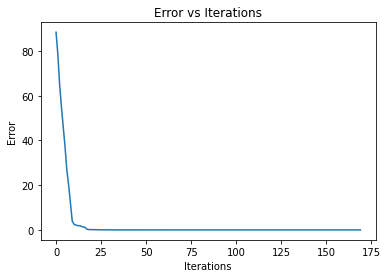

In [25]:
print("Linearly Independent Vectors")
print("----------------------------")
start_time = time.time()
w, errors = WidrowLearning(A)                        # Weight calculation
print("Error:", MeanSquaredError(w, A, norm=True))   # Error calculation
print("Time Taken: {}\n".format(time.time() - start_time))

plt.figure()
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title("Error vs Iterations")
plt.show()

Linearly Dependent Vectors
----------------------------
Error: 1.6959431683266849e-28
Time Taken: 0.12672090530395508



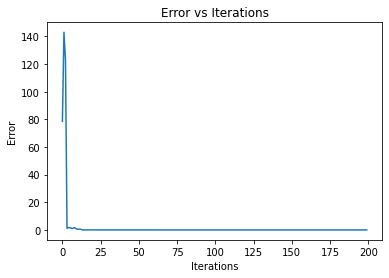

In [26]:
print("Linearly Dependent Vectors")
print("----------------------------")
start_time = time.time()
w1, errors1 = WidrowLearning(A1)                        # Weight calculation
print("Error:", MeanSquaredError(w1, A1, norm=True))    # Error calculation
print("Time Taken: {}\n".format(time.time() - start_time))

plt.figure()
plt.plot(errors1)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title("Error vs Iterations")
plt.show()

Orthonormal Vectors
-------------------
Error: 8.535207408052311e-21
Time Taken: 0.5910029411315918



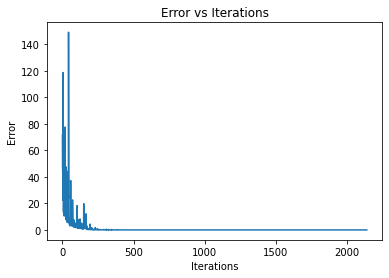

In [27]:
print("Orthonormal Vectors")
print("-------------------")
start_time = time.time()
w2, errors2 = WidrowLearning(A2)                      # Weight calculation
print("Error:", MeanSquaredError(w2, A2, norm=True))  # Error calculation
print("Time Taken: {}\n".format(time.time() - start_time))

plt.figure()
plt.plot(errors2)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title("Error vs Iterations")
plt.show()

## Observations
* **Comparison of different Methods/Algorithms:** <br /> <br />

| Vectors | Methods/Algorithms | Error | Time Taken (sec) |
| --- | --- | --- | --- |
| Linearly Independent | Computation | 1.42e-27 | 0.0058 |
| | Hebb's Law | 1887496.72 | 0.0010 |
| | Widrow-Hoff Law | 4.94e-21 | 0.047 |
| Linearly Dependent | Computation | 3.81e-26 | 0.034 |
| | Hebb's Law | 3.23e+21 | 0.0033 |
| | Widrow-Hoff Law | 1.16e-28 | 0.1267 |
| Orthonormal | Computation | 2.70e-31 | 0.0039 |
| | Hebb's Law | 6.39e-32 | 0.0021 |
| | Widrow-Hoff Law | 6.12e-21 | 0.5910 |

## Conclusion
* If the weights are computed then there is no error in case of linearly independent, linearly dependent and orthonormal vectors.
* If the weights are calculated using Hebb's Law there is a significant amount of error in the case of linearly independent and linearly dependent vectors. This can be attributed to the fact that in Hebb's Learning the learned weights are equal to $BA^T$ which is not close to $BA^+$. However, in the case of orthonormal vectors the error is very little.
* If the weights are calculated using Widrow-Hoff learning law, then there is no error in the case of linearly independent, linearly dependent and orthonormal vectors.
* For an auto-association problem, there is no limitation on the input dimension and the number of patterns that can be recalled by the network.
* The time taken by the computation method is significantly less than in the case of other algorithms.

## Proof for Conclusion
![Proof for conclusion](tmp/IMG_4670.jpg)

## References:
* Artificial Neural Networks, B. Yegnanarayana, 1999
* Householder Matrices: https://ocw.mit.edu/courses/mathematics/18-065-matrix-methods-in-data-analysis-signal-processing-and-machine-learning-spring-2018/video-lectures/lecture-3-orthonormal-columns-in-q-give-q2019q-i/